## Análisis Exploratorio de Datos (EDA) - Dataset: vehicles_us.csv

En este proyecto, analizaremos el conjunto de datos de anuncios de venta de vehículos en EE.UU.

Objetivo:  
Entender la estructura, calidad y contenido del dataset para identificar patrones, valores atípicos, relaciones entre variables y preparar los datos para análisis posteriores.

In [45]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [46]:
# Leer el archivo CSV
df_car = pd.read_csv('vehicles_us.csv')

# Mostrar las primeras filas
print("\t== Primeras filas del dataset:")
print(df_car.head())

	== Primeras filas del dataset:
   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  


In [47]:
# Información general: tipos de datos, valores no nulos
print("\n\tInformación general del dataframe:")
df_car.info()


	Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [48]:
# Estadísticas descriptivas para variables numéricas
print("\n\t == Estadísticas descriptivas:")
print(df_car.describe())


	 == Estadísticas descriptivas:
               price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000  


In [49]:
# Contar valores ausentes por columna
print("\n\t == Valores ausentes por columna:")
print(df_car.isna().sum())


	 == Valores ausentes por columna:
price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [50]:
#Tipos de datos por columna
print("\n\t == Tipos de datos por columna:")
print(df_car.dtypes)


	 == Tipos de datos por columna:
price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object


In [51]:
print("\n\t == Año mínimo y máximo de los modelos:")
print(f'\nEl modelo más antiguo es: ',df_car['model_year'].min())
print(f'El más reciente es:',df_car['model_year'].max())


	 == Año mínimo y máximo de los modelos:

El modelo más antiguo es:  1908.0
El más reciente es: 2019.0


In [68]:
# Convertir 'date_posted' a datetime
df_car['date_posted'] = pd.to_datetime(df_car['date_posted'])

# Asegurar que 'model_year' y 'cylinders' sean numéricos
df_car['model_year'] = pd.to_numeric(df_car['model_year'], errors='coerce')
df_car['cylinders'] = pd.to_numeric(df_car['cylinders'], errors='coerce')

# Crear columna 'age' (edad del vehículo en 2019)
df_car['age'] = 2019 - df_car['model_year']
# Eliminar filas con valores ausentes en 'price', 'odometer', 'model_year', 'cylinders'
df_car = df_car.dropna(subset=['price', 'odometer', 'model_year', 'cylinders'])
# Eliminar vehículos con modelo futuro (errores de datos)
df_car = df_car[df_car['age'] >= 0]

# Verificar
print(df_car[['model_year', 'age']].head())

   model_year  age
0      2011.0  8.0
2      2013.0  6.0
4      2017.0  2.0
5      2014.0  5.0
6      2015.0  4.0


**Manejar valores ausentes**

In [69]:
# Rellenar 'model_year' con la mediana por modelo
df_car['model_year'] = df_car.groupby('model')['model_year'].transform(
    lambda x: x.fillna(x.median())
)

# Recalcular 'age' después de rellenar 'model_year'
df_car['age'] = df_car['date_posted'].dt.year - df_car['model_year']

# Rellenar 'cylinders' con la moda por modelo
df_car['cylinders'] = df_car.groupby('model')['cylinders'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median())
)

# Rellenar 'odometer' con regresión simple por edad
# Ordenar por edad y rellenar por tendencia
df_car = df_car.sort_values('age')
df_car['odometer'] = df_car['odometer'].interpolate(method='linear', limit_direction='forward')

# Rellenar valores restantes con la mediana
df_car['odometer'] = df_car['odometer'].fillna(df_car['odometer'].median())

**Tratar valores atípicos en 'price'**

In [70]:
# Eliminar anuncios con precio = 0 o muy bajo
df_car = df_car[df_car['price'] > 500]

# Eliminar precios extremadamente altos (ej: > $100,000) si no son coches de lujo
q99 = df_car['price'].quantile(0.99)
df_car = df_car[df_car['price'] <= q99]

**Crear columnas útiles para visualización**

In [72]:
# Extraer marca del modelo (primera palabra de 'model')
df_car['manufacturer'] = df_car['model'].str.split().str[0].str.title()

# Clasificar por tipo de combustible
df_car['fuel'] = df_car['fuel'].str.lower().str.strip()

# Crear categoría de condición de edad
df_car['age_category'] = pd.cut(
    df_car['age'],
    bins=[0, 3, 7, 15, 100],
    labels=['Nuevo (0-3)', 'Reciente (4-7)', 'Usado (8-15)', 'Viejo (>15)']
)

# Crear categoría de precio
df_car['price_category'] = pd.cut(
    df_car['price'],
    bins=[0, 15000, 30000, 100000],
    labels=['Bajo', 'Medio', 'Alto']
)

**✅ Revisar y confirmar limpieza**

In [74]:
print("Forma después de limpieza:", df_car.shape)
print("\n \t == Valores nulos por columna:")
print(df_car.isna().sum())

print("\n \t == Estadísticas básicas:")
print(df_car[['price', 'odometer', 'age']].describe())

Forma después de limpieza: (34860, 17)

 	 == Valores nulos por columna:
price                 0
model_year            0
model                 0
condition             0
cylinders             0
fuel                  0
odometer              0
transmission          0
type                  0
paint_color        6220
is_4wd            17791
date_posted           0
days_listed           0
age                   0
manufacturer          0
age_category       1001
price_category        0
dtype: int64

 	 == Estadísticas básicas:
              price       odometer           age
count  34860.000000   34860.000000  34860.000000
mean   11912.801090  118661.731928      8.757975
std     8538.396437   63693.479543      6.133705
min      534.000000       1.000000      0.000000
25%     5300.000000   74605.000000      4.000000
50%     9400.000000  115900.000000      8.000000
75%    16500.000000  156950.250000     12.000000
max    42995.000000  990000.000000    110.000000


**✅ Análisis de Precios**

Precio mínimo: 1
Precio máximo: 375000
Precio promedio: 12132.464919941776
Mediana de precio: 9000.0


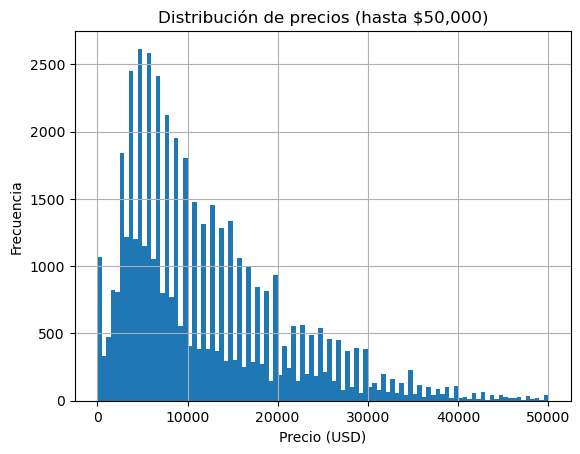

In [53]:
# Ver valores extremos
print("Precio mínimo:", df_car['price'].min())
print("Precio máximo:", df_car['price'].max())
print("Precio promedio:", df_car['price'].mean())
print("Mediana de precio:", df_car['price'].median())

# Histograma rápido
df_car['price'].hist(bins=100, range=(0, 50000))
plt.title('Distribución de precios (hasta $50,000)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()

**Hallazgos:**
- Hay muchos anuncios con precio = 0 → datos mal ingresados o no disponibles
- Algunos precios extremadamente altos (ej: $300,000+) → posibles errores o vehículos de lujo

**✅ Análsis del Kilometraje (odómetro)**

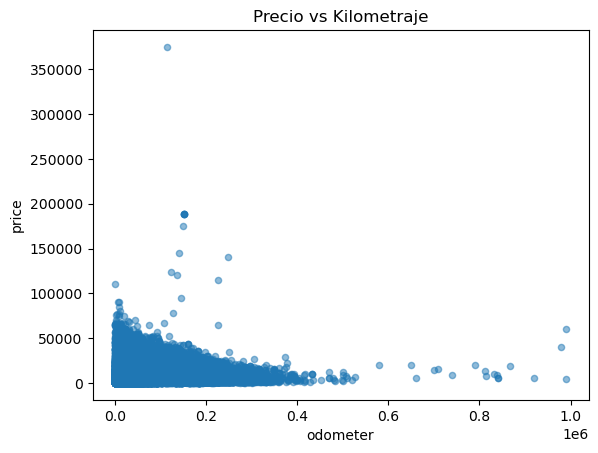

In [54]:
# Relación entre precio y kilometraje
df_car.plot(x='odometer', y='price', kind='scatter', alpha=0.5)
plt.title('Precio vs Kilometraje')
plt.show()

**Hallazgos:**
- Relación esperada: a mayor kilometraje, menor precio
- Algunos puntos extraños:
    - Alto kilometraje y alto precio → posiblemente clásicos
    - Bajo kilometraje y alto precio → posiblemente dañados

**✅ Análisis por tipo de vehículo**

In [58]:
# Cantidad de vehículos por tipo
print("\t == Vehículos por tipo:")
print(df_car['type'].value_counts().head(5))
# Precio promedio por tipo
print("\n\t == Precio promedio por tipo:")
print(df_car.groupby('type')['price'].mean().sort_values(ascending=False).head(5))

	 == Vehículos por tipo:
type
SUV       12405
truck     12353
sedan     12154
pickup     6988
coupe      2303
Name: count, dtype: int64

	 == Precio promedio por tipo:
type
bus            17135.666667
truck          16734.894924
pickup         16057.410418
convertible    14575.881166
coupe          14353.442901
Name: price, dtype: float64


**✅ Análisis por condición**

In [59]:
# Precio promedio por condición
print("Precio promedio por condición:")
print(df_car.groupby('condition')['price'].mean())

Precio promedio por condición:
condition
excellent    12806.669842
fair          3386.502178
good         10877.439067
like new     16677.445593
new          26050.300699
salvage       4242.295652
Name: price, dtype: float64


**✅ Análisis por combustible**

In [65]:
# Precio y kilometraje por tipo de combustible
print("\t == Estadísticas por tipo de combustible:")
print("\n\t Estadísticas por precio de combustible:")
print(df_car.groupby('fuel')['price'].mean())
print("\n\t Estadísticas por Kilometraje de combustible:")
print(df_car.groupby('fuel')['odometer'].mean())

	 == Estadísticas por tipo de combustible:

	 Estadísticas por precio de combustible:
fuel
diesel      22494.328218
electric     7033.500000
gas         11348.114215
hybrid       7502.855746
other       17044.685185
Name: price, dtype: float64

	 Estadísticas por Kilometraje de combustible:
fuel
diesel      149092.143041
electric     77290.000000
gas         112943.572141
hybrid      125404.276353
other        83257.800000
Name: odometer, dtype: float64


In [75]:
import plotly.express as px

# Histograma de precios
fig1 = px.histogram(df_car, x='price', nbins=50, title='Distribución de precios')
fig1.show()

# Precio vs kilometraje
fig2 = px.scatter(df_car, x='odometer', y='price', color='condition', title='Precio vs Kilometraje')
fig2.show()

# Precio promedio por marca
fig3 = px.bar(df_car.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10),
              title='Precio promedio por marca')
fig3.show()

## Paso 4: Desarrollo del cuadro de mandos con Streamlit

Vamos a crear una aplicación web simple pero funcional que:
- Muestre un encabezado descriptivo
- Permita al usuario generar un histograma del odómetro
- Permita al usuario generar un gráfico de dispersión entre precio y odómetro
- Use casillas de verificación (`checkbox`) para una experiencia más fluida

La app se guardará en `app.py` y se ejecutará con `streamlit run app.py`